## HR Case Study Exploratory Data Analysis
    - The purpose of this notebook is to take the cleaned data and perform EDA as well as feature engineering

# Questions we want to answer in this notebook
- What does attrition look like for the various categorical variables
- General time analysis of hours worked over the year
- Job roles by gender
- Monthly income for the various job roles, correlations between this and other quantitative variables
- Which group had the highest percent salary hike
- Who are the lowest performing employees. (any identifyable simalarities?)

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [63]:
data = pd.read_csv('fulldata2.csv')
data.head()

,Unnamed: 0,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,April,August,December,February,January,July,June,March,May,November,October,September,FullYearHoursWorked,FullName
0,0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1,Y,11,8,0,1,6,1,0,0,3,4,2,3,3,163.631944,155.394722,141.147778,140.977778,130.835556,161.522222,139.826111,139.573889,125.864444,131.501111,132.720556,147.690833,1711.686944,Cristina Rivers
1,1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0,Y,23,8,1,6,3,5,1,4,3,2,4,2,4,162.228333,163.126667,163.800556,147.937500,134.975833,154.620278,162.849167,153.100833,138.999167,132.047222,154.110833,153.880278,1823.676667,Beth Bush
2,2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1,Y,15,8,3,5,2,5,0,3,2,2,1,3,3,149.563611,138.135278,147.621111,138.548333,133.398611,156.012500,146.973333,133.408333,138.610833,119.270556,146.597500,149.064167,1700.204167,Bradley Wright
3,3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3,Y,11,8,3,13,5,8,7,5,4,4,3,2,3,149.869722,130.016667,159.004444,135.360278,134.114722,153.477500,159.491111,129.300278,138.118611,122.262778,135.605833,143.892500,1694.514444,Zachary Clark
4,4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4,Y,12,8,2,9,2,6,0,4,4,1,3,3,3,167.636667,159.740278,175.652222,159.836944,143.806667,174.131389,168.908889,167.332500,160.623056,145.628333,168.800556,169.415278,1966.512778,Martin Stevens


In [64]:
# Checking data types
data.dtypes
# categary object types aren't carrying over so will have to manually change them over

object_to_cat = data.select_dtypes(include='object').columns
data[object_to_cat] = data[object_to_cat].astype('category')
data['FullName'] = data['FullName'].astype('str') #keeps full name as string not category
data.dtypes

Unnamed: 0                    int64
EmployeeID                    int64
Age                           int64
Attrition                  category
BusinessTravel             category
Department                 category
DistanceFromHome              int64
Education                     int64
EducationField             category
EmployeeCount                 int64
Gender                     category
JobLevel                      int64
JobRole                    category
MaritalStatus              category
MonthlyIncome                 int64
NumCompaniesWorked            int64
Over18                     category
PercentSalaryHike             int64
StandardHours                 int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
YearsAtCompany                int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
EnvironmentSatisfaction       int64
JobSatisfaction               int64
WorkLifeBalance             

In [71]:
# What does attrition look like for the various categorical variables

categoricaldata = data.select_dtypes(include='category').columns
categoricaldata

catdata = data[categoricaldata]
catdata

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
0,No,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married,Y
1,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,Y
2,No,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married,Y
3,No,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married,Y
4,No,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single,Y
...,...,...,...,...,...,...,...,...
4405,No,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Single,Y
4406,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Divorced,Y
4407,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y
4408,No,Travel_Rarely,Sales,Medical,Male,Laboratory Technician,Divorced,Y


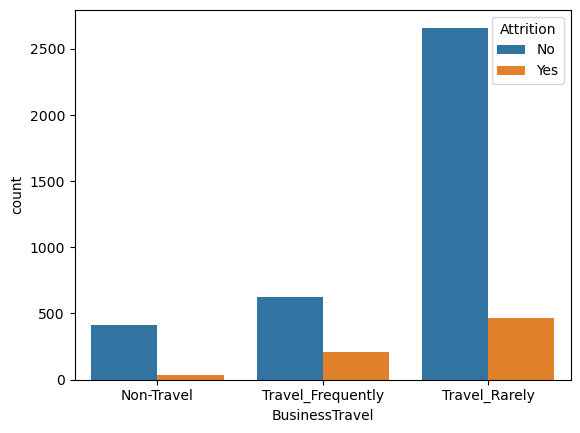

In [73]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=catdata)
plt.show()

#Those that rarely travel

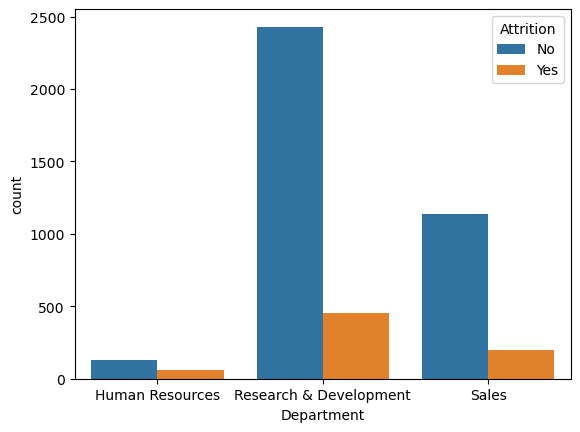

In [74]:
sns.countplot(x='Department', hue='Attrition', data=catdata)
plt.show()

# Those that are in Research and Development

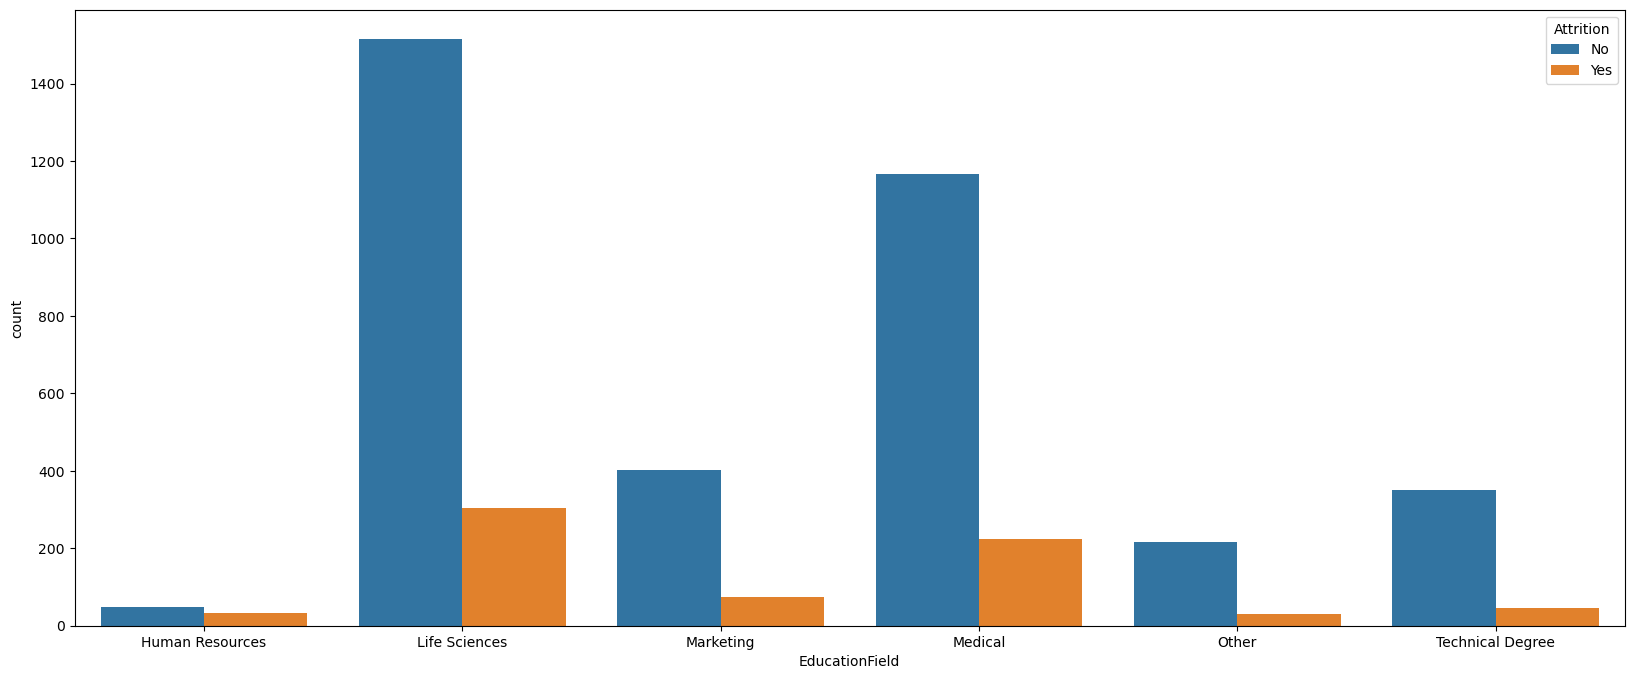

In [91]:
plt.figure(figsize=(20, 8))
sns.countplot(x='EducationField', hue='Attrition', data=catdata)
plt.show()

# Those that majored in life sciences

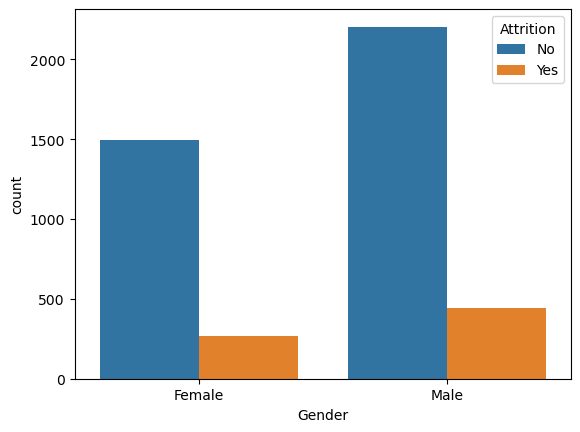

In [90]:
sns.countplot(x='Gender', hue='Attrition', data=catdata)
plt.show()

# Males

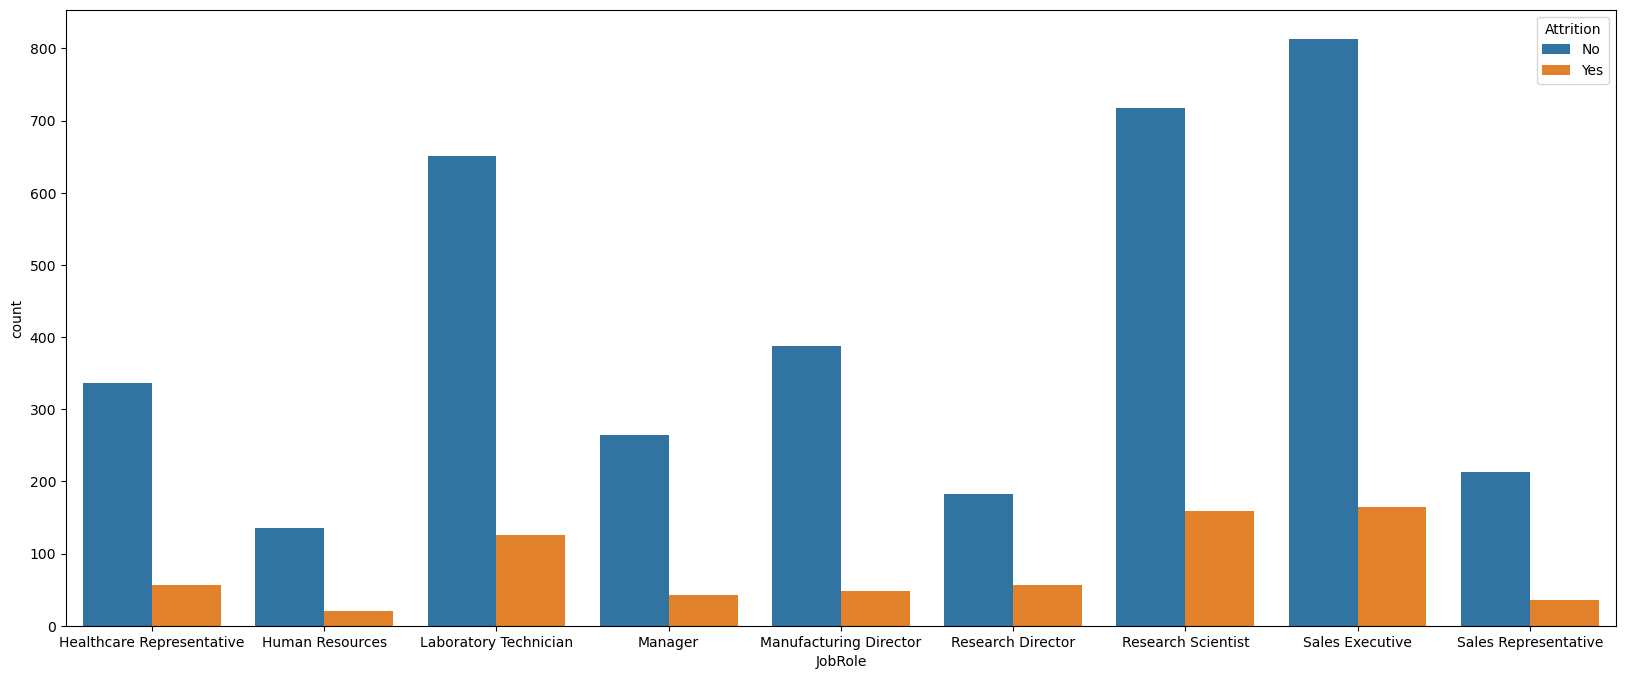

In [89]:
plt.figure(figsize=(20, 8))
sns.countplot(x='JobRole', hue='Attrition', data=catdata)
plt.show()

#Top three are Sales executives, research scientists, and labratroy technicians

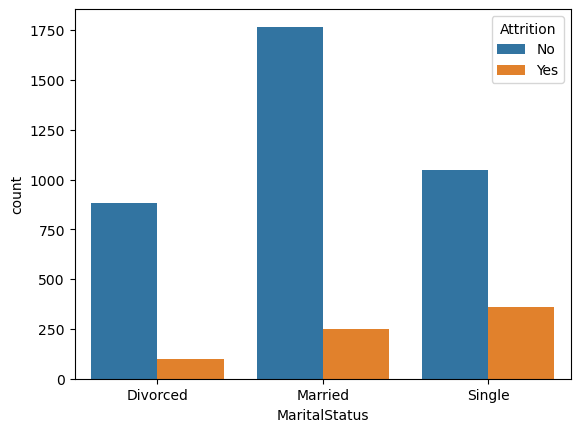

In [88]:
sns.countplot(x='MaritalStatus', hue='Attrition', data=catdata)
plt.show()

# Those that are single

Top individuals of attrition by category
- Those that travel rarely
- Those in the research and development program
- Those that majored in life sciences
- Males
- Top three positions for attrition are sales executives, research scientists, and labratroy technicians
- Those that are single

Average Monthly Salary by Department

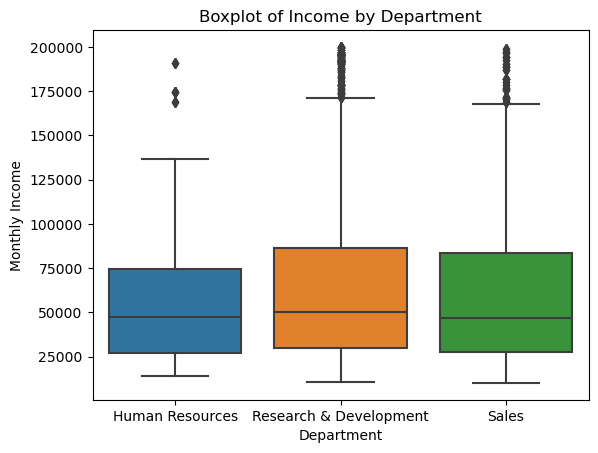

In [93]:
sns.boxplot(x='Department', y='MonthlyIncome', data=data)

plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.title('Boxplot of Income by Department')

plt.show()